In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

import time
start = time.time()

In [2]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [3]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


### conso.csv créé par pi4 node-red onglet Linky

In [4]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787214 entries, 0 to 1787213
Data columns (total 2 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Interval  int64  
 1   kWh       float64
dtypes: float64(1), int64(1)
memory usage: 27.3 MB


In [5]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1787209    0.16
1787210    0.16
1787211    0.17
1787212    0.16
1787213    0.16
Name: kWh, Length: 1787214, dtype: float64

In [6]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1787209    0.16
1787210    0.16
1787211    0.17
1787212    0.16
1787213    0.16
Name: kWh, Length: 1787214, dtype: float64

In [7]:
l=len(conso_data)-1
l

1787213

In [8]:
conso_data['sec']=conso_data['Interval']/1000


In [9]:
conso_data['Wh']=3600000/conso_data['Interval']


In [10]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [11]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787214 entries, 0 to 1787213
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Interval   int64  
 1   kWh        float64
 2   sec        float64
 3   Wh         float64
 4   cumul(ms)  int64  
dtypes: float64(3), int64(2)
memory usage: 68.2 MB


In [12]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1787209,21947,0.16,21.947,164.031531,43987055903
1787210,21822,0.16,21.822,164.971130,43987077725
1787211,21792,0.17,21.792,165.198238,43987099517
1787212,22074,0.16,22.074,163.087796,43987121591
1787213,22342,0.16,22.342,161.131501,43987143933


In [13]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

43987143933000

In [14]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 20, 33, 26, 139366)

In [15]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [16]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

# Recréer les dates à partir des cumuls par impulsion


In [17]:
base

datetime.datetime(2023, 8, 21, 20, 33, 26, 139366)

In [18]:
# create column 'dates' with time cumulated time from base
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data['dates']

0         2023-08-21 20:33:48.073366
1         2023-08-21 20:34:09.931366
2         2023-08-21 20:34:31.932366
3         2023-08-21 20:34:53.860366
4         2023-08-21 20:35:15.751366
                     ...            
1787209   2025-01-11 23:11:02.042366
1787210   2025-01-11 23:11:23.864366
1787211   2025-01-11 23:11:45.656366
1787212   2025-01-11 23:12:07.730366
1787213   2025-01-11 23:12:30.072366
Name: dates, Length: 1787214, dtype: datetime64[ns]

## créer les dates

In [19]:
# create column 'days' avec format 'dd/mm/yy'
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 20:33:48.073366,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 20:34:09.931366,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 20:34:31.932366,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 20:34:53.860366,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 20:35:15.751366,21/08/23
...,...,...,...,...,...,...,...
1787209,21947,0.16,21.947,164.031531,43987055903,2025-01-11 23:11:02.042366,11/01/25
1787210,21822,0.16,21.822,164.971130,43987077725,2025-01-11 23:11:23.864366,11/01/25
1787211,21792,0.17,21.792,165.198238,43987099517,2025-01-11 23:11:45.656366,11/01/25
1787212,22074,0.16,22.074,163.087796,43987121591,2025-01-11 23:12:07.730366,11/01/25


### save conso_data with dates

In [20]:
#to_csv(r'../conso_data_with_dates.csv',conso_data)

# tranche journalière


In [21]:
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('11/01/25', 11, 1, 2025)

In [22]:
here = now.strftime('%H:%M:%S')
here

'23:12:59'

In [23]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [24]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3623 entries, 1783591 to 1787213
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3623 non-null   int64         
 1   kWh        3623 non-null   float64       
 2   sec        3623 non-null   float64       
 3   Wh         3623 non-null   float64       
 4   cumul(ms)  3623 non-null   int64         
 5   dates      3623 non-null   datetime64[ns]
 6   days       3623 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 226.4+ KB


In [25]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000



In [26]:
data = list(df_grp['kWh'])
print(data)

[0.647, 3.693, 4.234, 3.688, 3.993, 4.628, 3.67, 3.434, 3.516, 3.7, 3.536, 4.025, 4.246, 3.644, 3.634, 3.64, 3.318, 3.376, 4.106, 4.037, 4.025, 4.058, 3.487, 4.319, 3.887, 3.752, 4.151, 4.691, 4.014, 3.222, 3.174, 3.889, 3.785, 3.091, 3.789, 4.162, 3.655, 3.692, 4.639, 4.249, 4.494, 3.839, 3.449, 4.276, 3.895, 3.825, 3.485, 4.023, 3.708, 3.423, 4.145, 3.382, 3.847, 3.867, 3.619, 3.745, 4.286, 3.276, 3.874, 3.097, 2.057, 2.048, 2.352, 4.073, 3.671, 4.306, 3.632, 3.962, 3.768, 3.763, 4.152, 3.993, 3.763, 3.134, 3.759, 3.58, 3.562, 3.712, 3.676, 3.315, 3.828, 3.259, 3.754, 3.6, 4.069, 3.56, 3.505, 3.707, 4.11, 4.336, 3.933, 4.141, 4.273, 3.8, 3.921, 3.814, 3.77, 3.843, 4.054, 4.398, 3.887, 3.501, 3.68, 3.677, 3.347, 3.843, 3.948, 4.15, 3.522, 4.151, 3.601, 3.932, 4.657, 3.611, 3.544, 3.534, 4.03, 3.841, 4.101, 3.851, 3.849, 3.611, 5.095, 3.738, 3.76, 4.225, 4.164, 4.48, 4.446, 4.146, 3.61, 4.451, 4.75, 4.115, 4.764, 4.423, 3.684, 4.08, 3.847, 3.615, 3.56, 3.97, 3.676, 3.708, 3.633, 3.489,

In [27]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [28]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df = conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [29]:
df = conso_data
len(df)

1787214

In [30]:
period(p=2)

2023-08-22 02:40:01.876366	2023-08-22 09:44:17.496366	7h 4m 15s 	2000


In [31]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.297357
dtype: float64

In [32]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.504341
dtype: float64

In [33]:
last=df_grp.iloc[-1]['kWh']
last

3.623

In [34]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3623 entries, 1783591 to 1787213
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3623 non-null   int64         
 1   kWh        3623 non-null   float64       
 2   sec        3623 non-null   float64       
 3   Wh         3623 non-null   float64       
 4   cumul(ms)  3623 non-null   int64         
 5   dates      3623 non-null   datetime64[ns]
 6   days       3623 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 226.4+ KB


In [35]:
# select day
day = today
#day = '16/08/24'


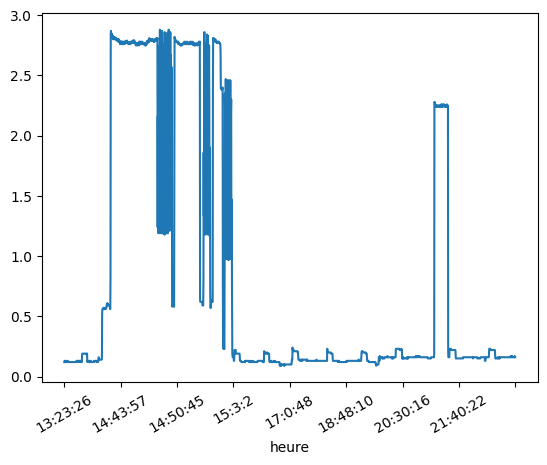

In [36]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [37]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 20:33:48.073366,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 20:34:09.931366,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 20:34:31.932366,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 20:34:53.860366,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 20:35:15.751366,21/08/23
...,...,...,...,...,...,...,...
1787209,21947,0.16,21.947,164.031531,43987055903,2025-01-11 23:11:02.042366,11/01/25
1787210,21822,0.16,21.822,164.971130,43987077725,2025-01-11 23:11:23.864366,11/01/25
1787211,21792,0.17,21.792,165.198238,43987099517,2025-01-11 23:11:45.656366,11/01/25
1787212,22074,0.16,22.074,163.087796,43987121591,2025-01-11 23:12:07.730366,11/01/25


In [38]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:1,28320,0.13,28.320,127.118644,43903595336,2025-01-11 00:00:01.475366,11/01/25
0:0:29,28290,0.13,28.290,127.253446,43903623626,2025-01-11 00:00:29.765366,11/01/25
0:0:58,28584,0.12,28.584,125.944584,43903652210,2025-01-11 00:00:58.349366,11/01/25
0:1:26,28588,0.12,28.588,125.926962,43903680798,2025-01-11 00:01:26.937366,11/01/25
0:1:55,29001,0.12,29.001,124.133651,43903709799,2025-01-11 00:01:55.938366,11/01/25
...,...,...,...,...,...,...,...
23:11:2,21947,0.16,21.947,164.031531,43987055903,2025-01-11 23:11:02.042366,11/01/25
23:11:23,21822,0.16,21.822,164.971130,43987077725,2025-01-11 23:11:23.864366,11/01/25
23:11:45,21792,0.17,21.792,165.198238,43987099517,2025-01-11 23:11:45.656366,11/01/25


In [39]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 23/12/24 5.049
Min : 21/12/24 3.034


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1783591,28320,0.13,28.320,127.118644,43903595336,2025-01-11 00:00:01.475366,11/01/25,0:0:1
1783592,28290,0.13,28.290,127.253446,43903623626,2025-01-11 00:00:29.765366,11/01/25,0:0:29
1783593,28584,0.12,28.584,125.944584,43903652210,2025-01-11 00:00:58.349366,11/01/25,0:0:58
1783594,28588,0.12,28.588,125.926962,43903680798,2025-01-11 00:01:26.937366,11/01/25,0:1:26
1783595,29001,0.12,29.001,124.133651,43903709799,2025-01-11 00:01:55.938366,11/01/25,0:1:55
...,...,...,...,...,...,...,...,...
1787209,21947,0.16,21.947,164.031531,43987055903,2025-01-11 23:11:02.042366,11/01/25,23:11:2
1787210,21822,0.16,21.822,164.971130,43987077725,2025-01-11 23:11:23.864366,11/01/25,23:11:23
1787211,21792,0.17,21.792,165.198238,43987099517,2025-01-11 23:11:45.656366,11/01/25,23:11:45
1787212,22074,0.16,22.074,163.087796,43987121591,2025-01-11 23:12:07.730366,11/01/25,23:12:7


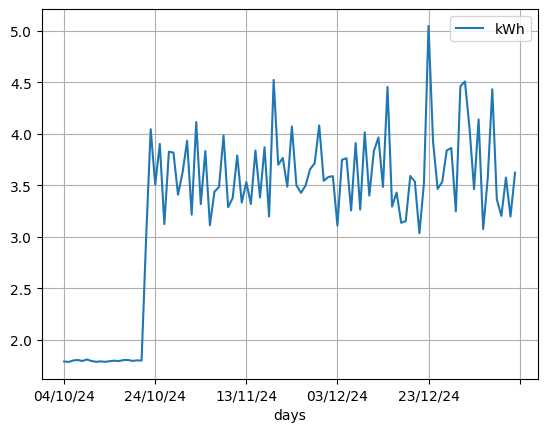

In [40]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2025-01-11 00:00:01.475366	2025-01-11 09:00:19.407366	9h 0m 17s 	1000
2025-01-11 09:00:19.407366	2025-01-11 14:46:41.171366	5h 46m 21s 	2000
2025-01-11 14:46:41.171366	2025-01-11 19:43:03.183366	4h 56m 22s 	3000
2025-01-11 19:43:03.183366	2025-01-11 23:12:30.072366	3h 29m 26s 	623
<class 'pandas.core.frame.DataFrame'>
Index: 3623 entries, 1783591 to 1787213
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3623 non-null   int64         
 1   kWh        3623 non-null   float64       
 2   sec        3623 non-null   float64       
 3   Wh         3623 non-null   float64       
 4   cumul(ms)  3623 non-null   int64         
 5   dates      3623 non-null   datetime64[ns]
 6   days       3623 non-null   object        
 7   heure      3623 non-null   object        
 8   hours      3623 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 283.0+ KB


('11/01/25', <Axes: xlabel='hours'>)

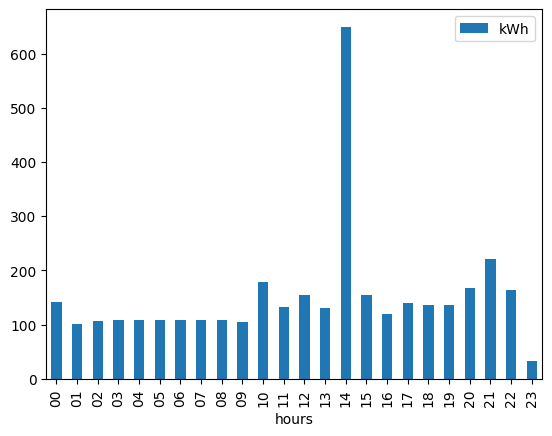

In [41]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [42]:
df_grp

,kWh
days,
21/08/23,0.647
22/08/23,3.693
23/08/23,4.234
24/08/23,3.688
25/08/23,3.993
...,...
07/01/25,3.363
08/01/25,3.203
09/01/25,3.575


In [43]:
# select number of days to display
span = 30
#df_grp.tail(span)


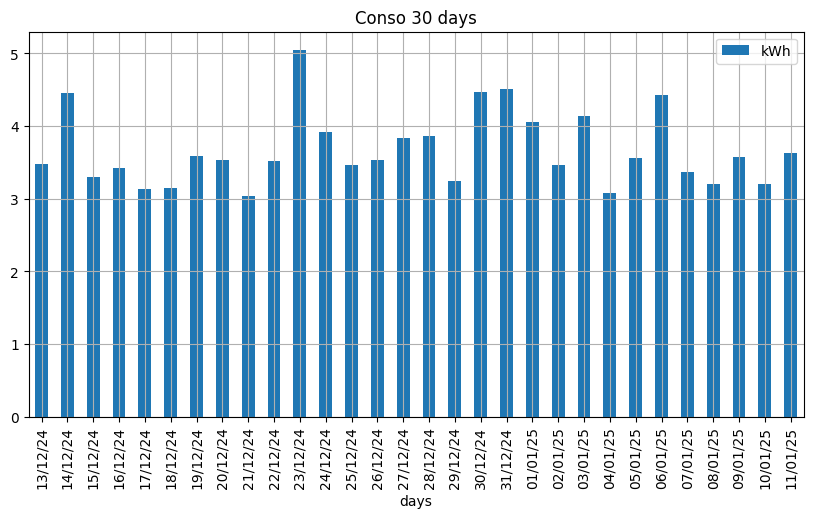

In [44]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


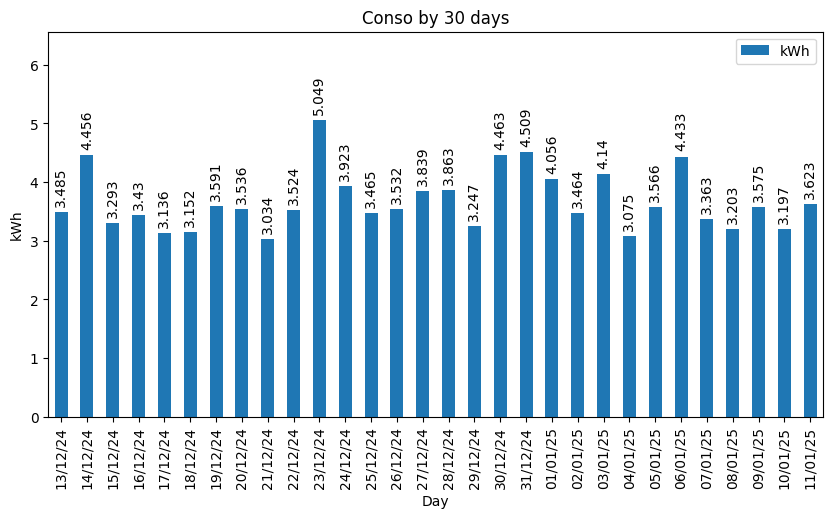

In [45]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [46]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
13/12/24    3.485
14/12/24    4.456
15/12/24    3.293
16/12/24    3.430
17/12/24    3.136
18/12/24    3.152
19/12/24    3.591
20/12/24    3.536
21/12/24    3.034
22/12/24    3.524
23/12/24    5.049
24/12/24    3.923
25/12/24    3.465
26/12/24    3.532
27/12/24    3.839
28/12/24    3.863
29/12/24    3.247
30/12/24    4.463
31/12/24    4.509
01/01/25    4.056
02/01/25    3.464
03/01/25    4.140
04/01/25    3.075
05/01/25    3.566
06/01/25    4.433
07/01/25    3.363
08/01/25    3.203
09/01/25    3.575
10/01/25    3.197
11/01/25    3.623
Name: kWh, dtype: float64

In [47]:
x_labels=df_grp.tail(span).index
x_labels

Index(['13/12/24', '14/12/24', '15/12/24', '16/12/24', '17/12/24', '18/12/24',
       '19/12/24', '20/12/24', '21/12/24', '22/12/24', '23/12/24', '24/12/24',
       '25/12/24', '26/12/24', '27/12/24', '28/12/24', '29/12/24', '30/12/24',
       '31/12/24', '01/01/25', '02/01/25', '03/01/25', '04/01/25', '05/01/25',
       '06/01/25', '07/01/25', '08/01/25', '09/01/25', '10/01/25', '11/01/25'],
      dtype='object', name='days')

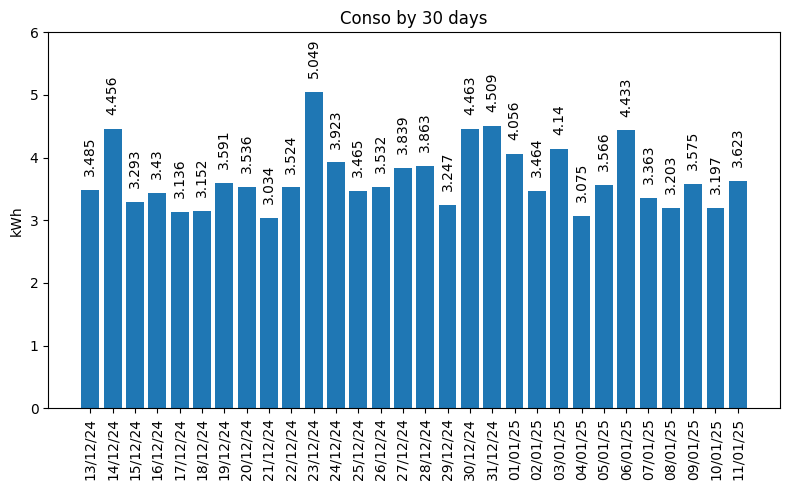

In [48]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [49]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

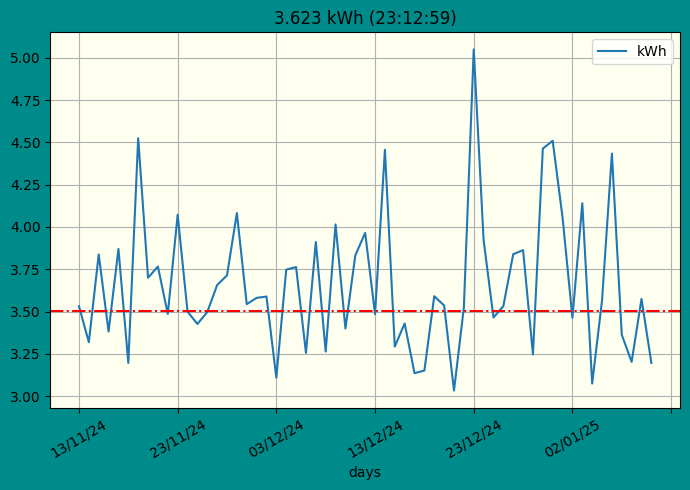

In [50]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


Text(0.5, 1.0, 'Variations journalières')

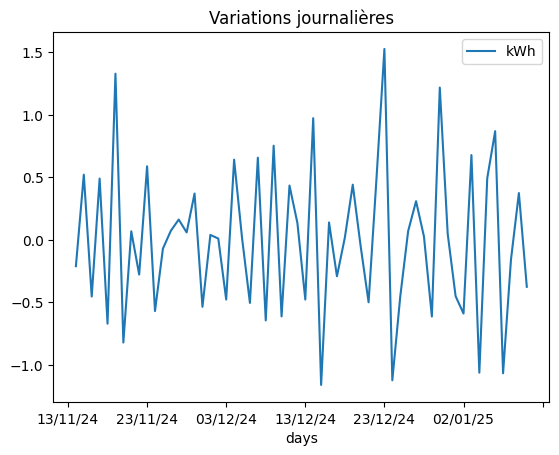

In [51]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [52]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 20:33:48.073366,21/08/23,20
1,21858,0.16,21.858,164.699424,43792,2023-08-21 20:34:09.931366,21/08/23,20
2,22001,0.16,22.001,163.628926,65793,2023-08-21 20:34:31.932366,21/08/23,20
3,21928,0.16,21.928,164.173659,87721,2023-08-21 20:34:53.860366,21/08/23,20
4,21891,0.16,21.891,164.451144,109612,2023-08-21 20:35:15.751366,21/08/23,20
...,...,...,...,...,...,...,...,...
1787209,21947,0.16,21.947,164.031531,43987055903,2025-01-11 23:11:02.042366,11/01/25,23
1787210,21822,0.16,21.822,164.971130,43987077725,2025-01-11 23:11:23.864366,11/01/25,23
1787211,21792,0.17,21.792,165.198238,43987099517,2025-01-11 23:11:45.656366,11/01/25,23
1787212,22074,0.16,22.074,163.087796,43987121591,2025-01-11 23:12:07.730366,11/01/25,23


In [53]:
# example groupby with apply
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df.groupby("Animal", group_keys=True)[['Max Speed']].apply(lambda x: x)
      

Max Speed
Animal             
Falcon 0      380.0
       1      370.0
Parrot 2       24.0
       3       26.0

In [54]:
import pandas as pd
df = pd.read_csv(r'C:\Users\jean\Downloads\only-bh-extreme-events-satellite.csv'
                  ,index_col=[0,1,2,3,4]
                  ,header=[0,1,2,3]
                  ,skipinitialspace=True
                  #,tupleize_cols=True
                ) 

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index.names

FrozenList(['wsid', 'lat', 'lon', 'start', 'prcp_24'])

In [55]:
index=df.columns.levels[0]
index

Index(['al', 'asn', 'cc', 'chnk', 'ci', 'ciwc', 'clwc', 'd', 'd2m', 'hcc',
       'istl1', 'istl2', 'istl3', 'istl4', 'lcc', 'lsrh', 'mcc', 'msl', 'o3',
       'p53.162', 'p54.162', 'p55.162', 'p56.162', 'p57.162', 'p58.162',
       'p59.162', 'p60.162', 'p61.162', 'p62.162', 'p63.162', 'p64.162',
       'p65.162', 'p66.162', 'p67.162', 'p68.162', 'p69.162', 'p70.162',
       'p71.162', 'p72.162', 'p73.162', 'p74.162', 'p75.162', 'p76.162',
       'p77.162', 'p78.162', 'p79.162', 'p80.162', 'p81.162', 'p82.162',
       'p83.162', 'p84.162', 'p85.162', 'p86.162', 'p87.162', 'p88.162',
       'p89.162', 'p90.162', 'p91.162', 'p92.162', 'pv', 'q', 'r', 'rsn', 'sd',
       'skt', 'sp', 'sr', 'src', 'sst', 'stl1', 'stl2', 'stl3', 'stl4',
       'swvl1', 'swvl2', 'swvl3', 'swvl4', 't', 't2m', 'tcc', 'tco3', 'tcw',
       'tcwv', 'tsn', 'u', 'u10', 'v', 'v10', 'vo', 'w', 'z'],
      dtype='object')

In [56]:
df_des = pd.DataFrame(
                            index=df.columns.levels[0],
                            columns=['count','mean','std','min','25','50','75','max']
                         )
df_des

,count,mean,std,min,25,50,75,max
al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chnk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days'], sort=False)
groupallbyday[['kWh']].count()  #.apply(lambda x: x))

,kWh
days,
21/08/23,647
22/08/23,3693
23/08/23,4234
24/08/23,3688
25/08/23,3993
...,...
07/01/25,3363
08/01/25,3203
09/01/25,3575


In [58]:
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 20:33:48.073366,21/08/23,20
1,21858,0.16,21.858,164.699424,43792,2023-08-21 20:34:09.931366,21/08/23,20
2,22001,0.16,22.001,163.628926,65793,2023-08-21 20:34:31.932366,21/08/23,20
3,21928,0.16,21.928,164.173659,87721,2023-08-21 20:34:53.860366,21/08/23,20
4,21891,0.16,21.891,164.451144,109612,2023-08-21 20:35:15.751366,21/08/23,20
...,...,...,...,...,...,...,...,...
1787209,21947,0.16,21.947,164.031531,43987055903,2025-01-11 23:11:02.042366,11/01/25,23
1787210,21822,0.16,21.822,164.971130,43987077725,2025-01-11 23:11:23.864366,11/01/25,23
1787211,21792,0.17,21.792,165.198238,43987099517,2025-01-11 23:11:45.656366,11/01/25,23
1787212,22074,0.16,22.074,163.087796,43987121591,2025-01-11 23:12:07.730366,11/01/25,23


In [59]:

# group all by day for all conso_days
groupallbydayhours = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
# use apply to show the group
groupallbydayhours[['days','hours','kWh']].apply(lambda x: x)


days hours   kWh
days     hours                              
21/08/23 20    0        21/08/23    20  0.16
               1        21/08/23    20  0.16
               2        21/08/23    20  0.16
               3        21/08/23    20  0.16
               4        21/08/23    20  0.16
...                          ...   ...   ...
11/01/25 23    1787209  11/01/25    23  0.16
               1787210  11/01/25    23  0.16
               1787211  11/01/25    23  0.17
               1787212  11/01/25    23  0.16
               1787213  11/01/25    23  0.16

[1787214 rows x 3 columns]

In [60]:
groupallbyday.indices.keys()

dict_keys(['21/08/23', '22/08/23', '23/08/23', '24/08/23', '25/08/23', '26/08/23', '27/08/23', '28/08/23', '29/08/23', '30/08/23', '31/08/23', '01/09/23', '02/09/23', '03/09/23', '04/09/23', '05/09/23', '06/09/23', '07/09/23', '08/09/23', '09/09/23', '10/09/23', '11/09/23', '12/09/23', '13/09/23', '14/09/23', '15/09/23', '16/09/23', '17/09/23', '18/09/23', '19/09/23', '20/09/23', '21/09/23', '22/09/23', '23/09/23', '24/09/23', '25/09/23', '26/09/23', '27/09/23', '28/09/23', '29/09/23', '30/09/23', '01/10/23', '02/10/23', '03/10/23', '04/10/23', '05/10/23', '06/10/23', '07/10/23', '08/10/23', '09/10/23', '10/10/23', '11/10/23', '12/10/23', '13/10/23', '14/10/23', '15/10/23', '16/10/23', '17/10/23', '18/10/23', '19/10/23', '20/10/23', '21/10/23', '22/10/23', '23/10/23', '24/10/23', '25/10/23', '26/10/23', '27/10/23', '28/10/23', '29/10/23', '30/10/23', '31/10/23', '01/11/23', '02/11/23', '03/11/23', '04/11/23', '05/11/23', '06/11/23', '07/11/23', '08/11/23', '09/11/23', '10/11/23', '11/1

In [61]:
groupallbydayhours.indices.keys()

dict_keys([('21/08/23', '20'), ('21/08/23', '21'), ('21/08/23', '22'), ('21/08/23', '23'), ('22/08/23', '20'), ('22/08/23', '21'), ('22/08/23', '22'), ('22/08/23', '23'), ('22/08/23', '00'), ('22/08/23', '01'), ('22/08/23', '02'), ('22/08/23', '03'), ('22/08/23', '04'), ('22/08/23', '05'), ('22/08/23', '06'), ('22/08/23', '07'), ('22/08/23', '08'), ('22/08/23', '09'), ('22/08/23', '10'), ('22/08/23', '11'), ('22/08/23', '12'), ('22/08/23', '13'), ('22/08/23', '14'), ('22/08/23', '15'), ('22/08/23', '16'), ('22/08/23', '17'), ('22/08/23', '18'), ('22/08/23', '19'), ('23/08/23', '20'), ('23/08/23', '21'), ('23/08/23', '22'), ('23/08/23', '23'), ('23/08/23', '00'), ('23/08/23', '01'), ('23/08/23', '02'), ('23/08/23', '03'), ('23/08/23', '04'), ('23/08/23', '05'), ('23/08/23', '06'), ('23/08/23', '07'), ('23/08/23', '08'), ('23/08/23', '09'), ('23/08/23', '10'), ('23/08/23', '11'), ('23/08/23', '12'), ('23/08/23', '13'), ('23/08/23', '14'), ('23/08/23', '15'), ('23/08/23', '16'), ('23/08/2

In [62]:
grp_by_day = groupallbyday.count()
grp_by_day

,hours,kWh
days,,
21/08/23,647,647
22/08/23,3693,3693
23/08/23,4234,4234
24/08/23,3688,3688
25/08/23,3993,3993
...,...,...
07/01/25,3363,3363
08/01/25,3203,3203
09/01/25,3575,3575


In [63]:
grp_by_day['kWh'].cumsum()

days
21/08/23        647
22/08/23       4340
23/08/23       8574
24/08/23      12262
25/08/23      16255
             ...   
07/01/25    1773616
08/01/25    1776819
09/01/25    1780394
10/01/25    1783591
11/01/25    1787214
Name: kWh, Length: 510, dtype: int64

In [64]:
grp_by_dayhours = groupallbydayhours.count()
grp_by_dayhours

kWh
days     hours     
21/08/23 20      76
         21     282
         22     157
         23     132
22/08/23 00     133
...             ...
11/01/25 19     136
         20     168
         21     222
         22     164
         23      34

[12220 rows x 1 columns]

In [65]:
grp_by_dayhours['kWh'].cumsum()

days      hours
21/08/23  20            76
          21           358
          22           515
          23           647
22/08/23  00           780
                    ...   
11/01/25  19       1786626
          20       1786794
          21       1787016
          22       1787180
          23       1787214
Name: kWh, Length: 12220, dtype: int64

In [66]:
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(level=0)['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(level=0)['kWh'].diff()
# or
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(['days'])['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(['days'])['kWh'].diff()
grp_by_dayhours

kWh  cumsum   diff
days     hours                    
21/08/23 20      76      76    NaN
         21     282     358  206.0
         22     157     515 -125.0
         23     132     647  -25.0
22/08/23 00     133     133    NaN
...             ...     ...    ...
11/01/25 19     136    3035   -1.0
         20     168    3203   32.0
         21     222    3425   54.0
         22     164    3589  -58.0
         23      34    3623 -130.0

[12220 rows x 3 columns]

In [67]:
today, grp_by_dayhours.loc[today]

('11/01/25',
        kWh  cumsum   diff
 hours                    
 00     141     141    NaN
 01     102     243  -39.0
 02     107     350    5.0
 03     109     459    2.0
 04     108     567   -1.0
 05     108     675    0.0
 06     108     783    0.0
 07     108     891    0.0
 08     108     999    0.0
 09     105    1104   -3.0
 10     178    1282   73.0
 11     132    1414  -46.0
 12     155    1569   23.0
 13     130    1699  -25.0
 14     649    2348  519.0
 15     154    2502 -495.0
 16     120    2622  -34.0
 17     140    2762   20.0
 18     137    2899   -3.0
 19     136    3035   -1.0
 20     168    3203   32.0
 21     222    3425   54.0
 22     164    3589  -58.0
 23      34    3623 -130.0)

Text(0.5, 1.0, 'Cumul journalier')

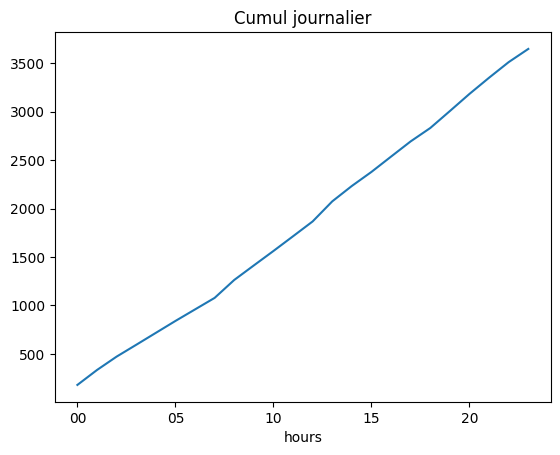

In [68]:
# progression sans surprise
grp_by_dayhours.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

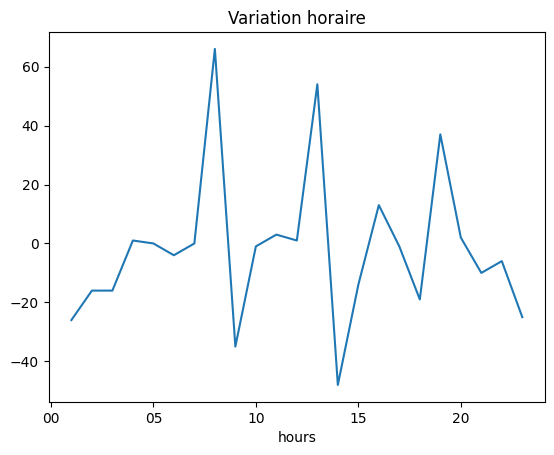

In [69]:
# plus parlant
grp_by_dayhours.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [70]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_dayhours.index.levels[0].unique())
# or
n = len(grp_by_dayhours.index.levels[0])
# or
n = grp_by_dayhours.index.levshape[0]  # levshape -> (371,24)
n

510

In [71]:
df_grp.tail(n)['kWh'].describe()


count    510.000000
mean       3.504341
std        0.681725
min        0.647000
25%        3.338250
50%        3.614000
75%        3.873750
max        5.095000
Name: kWh, dtype: float64

In [72]:
maxday = df_grp.tail(n)['kWh'].idxmax()

Text(0.5, 1.0, '510 days')

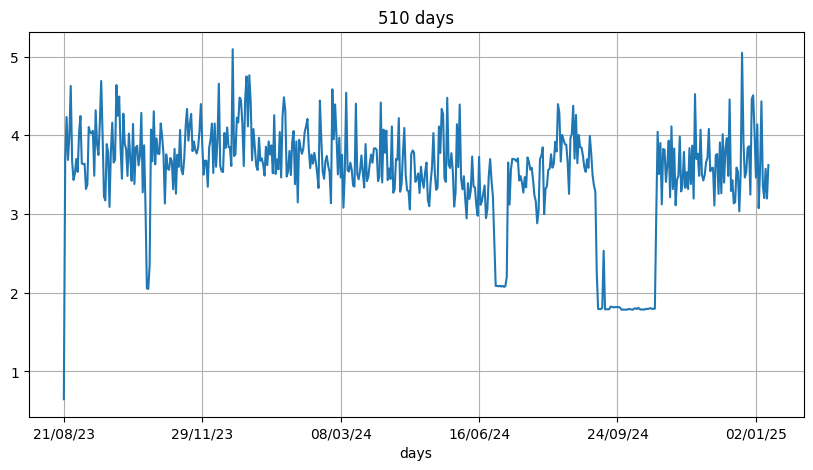

In [73]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

Text(0.5, 1.0, '400 days')

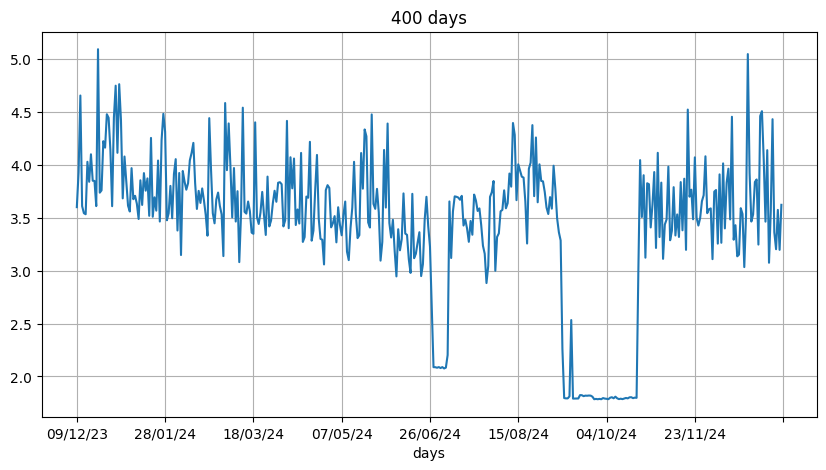

In [74]:
# show conso in span 
span = 400
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [75]:
df_grp['kWh']

days
21/08/23    0.647
22/08/23    3.693
23/08/23    4.234
24/08/23    3.688
25/08/23    3.993
            ...  
07/01/25    3.363
08/01/25    3.203
09/01/25    3.575
10/01/25    3.197
11/01/25    3.623
Name: kWh, Length: 510, dtype: float64

In [76]:
df_grp.describe()

,kWh
count,510.000000
mean,3.504341
std,0.681725
min,0.647000
25%,3.338250
50%,3.614000
75%,3.873750
max,5.095000


array([[<Axes: title={'center': 'kWh'}>]], dtype=object)

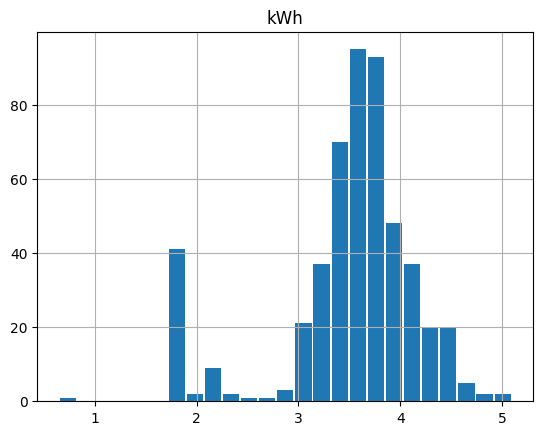

In [77]:
# répartition des consos de 1 à 5 kWh par jour
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
# histtype{'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'
df_grp.hist(bins=25, density=False, histtype='bar',rwidth=0.9, align='mid')

In [78]:
df_grp.tail(span)['kWh']

days
09/12/23    3.601
10/12/23    3.932
11/12/23    4.657
12/12/23    3.611
13/12/23    3.544
            ...  
07/01/25    3.363
08/01/25    3.203
09/01/25    3.575
10/01/25    3.197
11/01/25    3.623
Name: kWh, Length: 400, dtype: float64

# Conso par heure

In [79]:
day

'11/01/25'

In [80]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff
hours,,,
00,141,141,NaN
01,102,243,-39.0
02,107,350,5.0
03,109,459,2.0
04,108,567,-1.0
05,108,675,0.0
06,108,783,0.0
07,108,891,0.0
08,108,999,0.0


In [81]:
# select a day to plot
day = '02/07/24'
day = today
len(grp_by_dayhours.loc[day])


24

In [82]:
l = range(1,len(grp_by_dayhours.loc[day])+1)
l

range(1, 25)

In [83]:
grp_by_dayhours.loc[day,'days'] = l #ist(1,len(grp_by_day.loc[day])+1)

In [84]:
grp_by_dayhours.loc[day,'days'].values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.])

In [85]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
11    12.0
12    13.0
13    14.0
14    15.0
15    16.0
16    17.0
17    18.0
18    19.0
19    20.0
20    21.0
21    22.0
22    23.0
23    24.0
Name: days, dtype: float64

In [86]:
### ????????????????????????
grp_by_dayhours.loc[day,'days'] = grp_by_dayhours.loc[day,'days'].values.astype('int64')

In [87]:
grp_by_dayhours.loc[day].info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 00 to 23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     24 non-null     int64  
 1   cumsum  24 non-null     int64  
 2   diff    23 non-null     float64
 3   days    24 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 960.0+ bytes


In [88]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
11    12.0
12    13.0
13    14.0
14    15.0
15    16.0
16    17.0
17    18.0
18    19.0
19    20.0
20    21.0
21    22.0
22    23.0
23    24.0
Name: days, dtype: float64

In [89]:
day

'11/01/25'

In [90]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff,days
hours,,,,
00,141,141,NaN,1.0
01,102,243,-39.0,2.0
02,107,350,5.0,3.0
03,109,459,2.0,4.0
04,108,567,-1.0,5.0
05,108,675,0.0,6.0
06,108,783,0.0,7.0
07,108,891,0.0,8.0
08,108,999,0.0,9.0


Text(0.5, 1.0, '11/01/25')

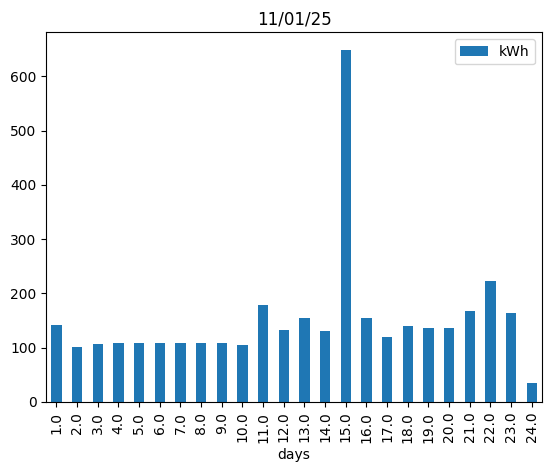

In [91]:
grp_by_dayhours.loc[day][['days','kWh']].plot.bar(x='days')
plt.title(f'{day}')

In [92]:
grp_by_dayhours.loc[day].index

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'],
      dtype='object', name='hours')

# Conso du jour


In [93]:
groupedbyhour.count()

,kWh
hours,
00,141
01,102
02,107
03,109
04,108
05,108
06,108
07,108
08,108


In [94]:
day = '09/09/24'
day = maxday
#day = today
grp_by_dayhours.loc[day].kWh

hours
00    165
01    156
02    162
03    168
04    151
05    165
06    149
07    117
08    130
09    114
10    131
11    130
12    114
13    131
14    188
15    150
16    154
17    950
18    192
19    286
20    308
21    305
22    303
23    276
Name: kWh, dtype: int64

In [95]:
def conso_by_hour(day):
    global data
    # conso by hour
    #data = groupedbyhour.count().kWh
    data = grp_by_dayhours.loc[day].kWh

    # len(groupedbyhour)
    x = np.arange(1,len(data)+1)
    ymax = max(data)+5
    #groupedbyhour.count().plot(grid=True,xticks=x)
    fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

    plt.bar(x,data)
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) {day} - Total {sum(data)}')
    plt.xlim(0,len(x)+1)
    #plt.xticks(rotation=30);
    #plt.ylim(0,ymax)

    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in data]
    fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
            fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
        )


# 100 days

330.529

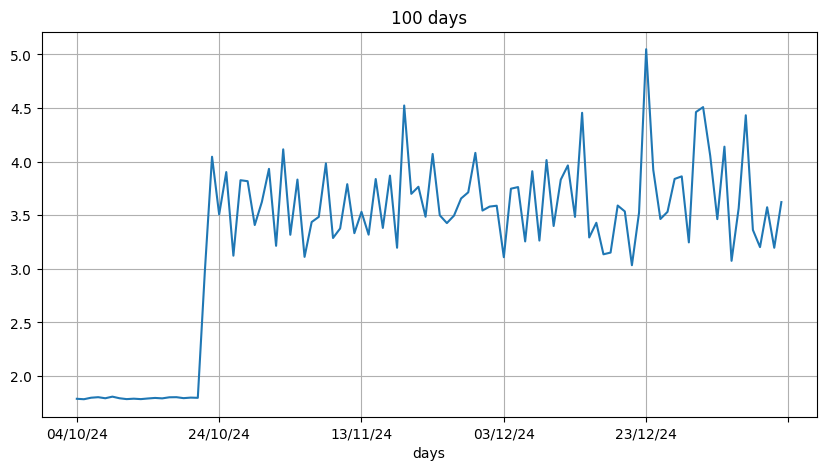

In [96]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')
sum(df_grp.tail(span)['kWh'])

In [97]:
df_grp.tail(1)

,kWh
days,
11/01/25,3.623


In [98]:
span = 1
#df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
#plt.title(f'{span} days')
sum(df_grp.tail(span)['kWh'])

3.623

In [99]:
#import timeit
#start = timeit.timeit()
#print("hello")
end = time.time()
print(end - start)

74.22681093215942


# Today

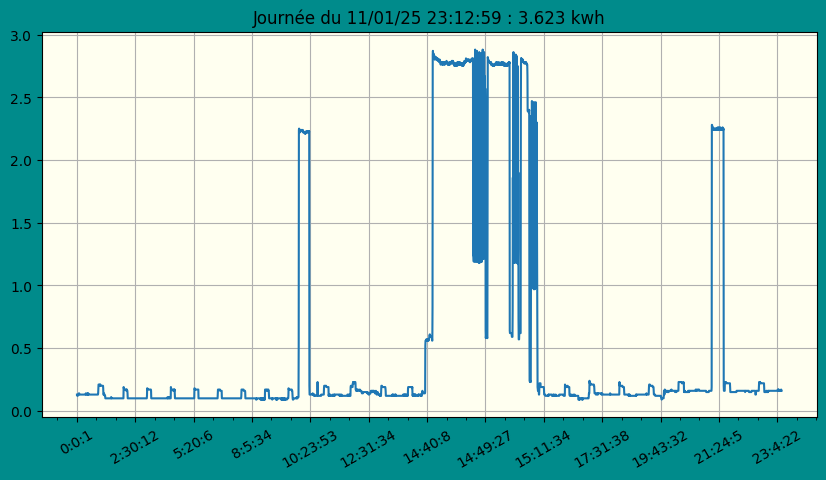

In [100]:
show(today,bgcolor='ivory')

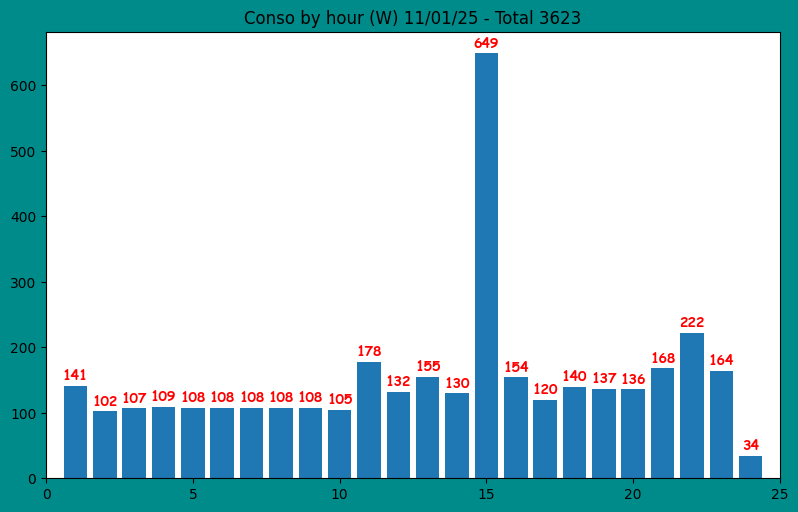

In [101]:
conso_by_hour(today)

In [102]:
day = '03/01/25'

('03/01/25', None)

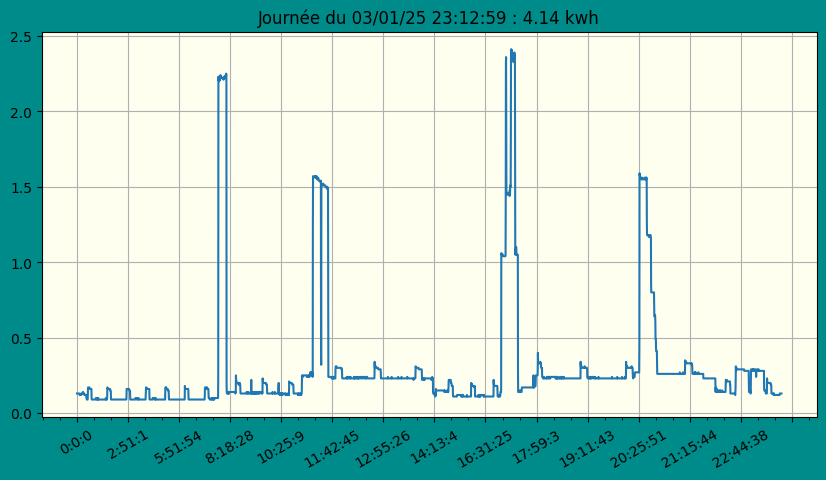

In [103]:
day, show(day,bgcolor='ivory')

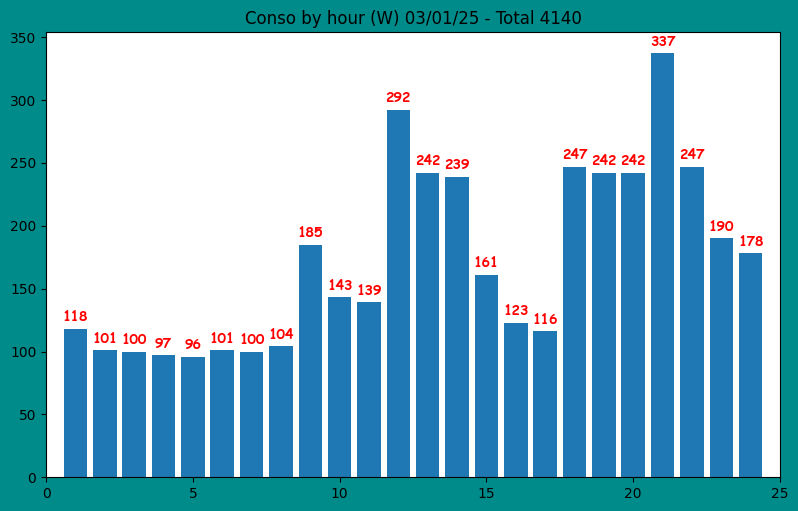

In [104]:
conso_by_hour(day)

In [105]:
maxday

'21/12/23'

('21/12/23', None)

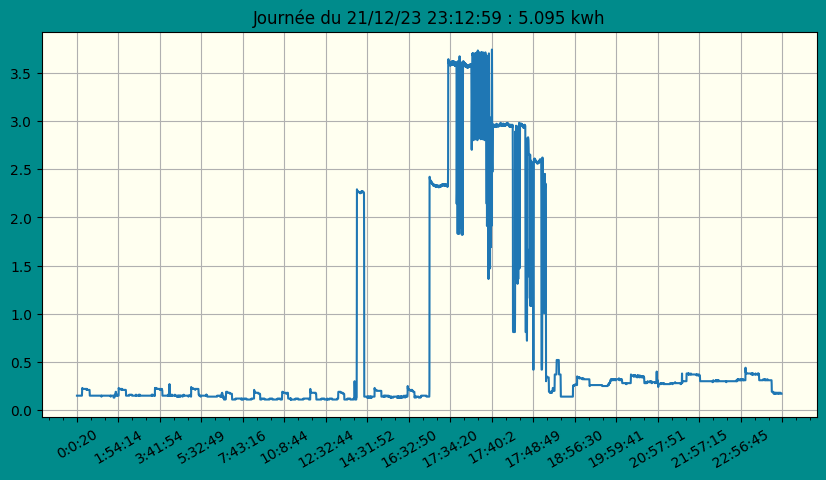

In [106]:
# retour vietnam 22/10/2024
#day = '22/10/24'
day = maxday
day, show(day,bgcolor='ivory')

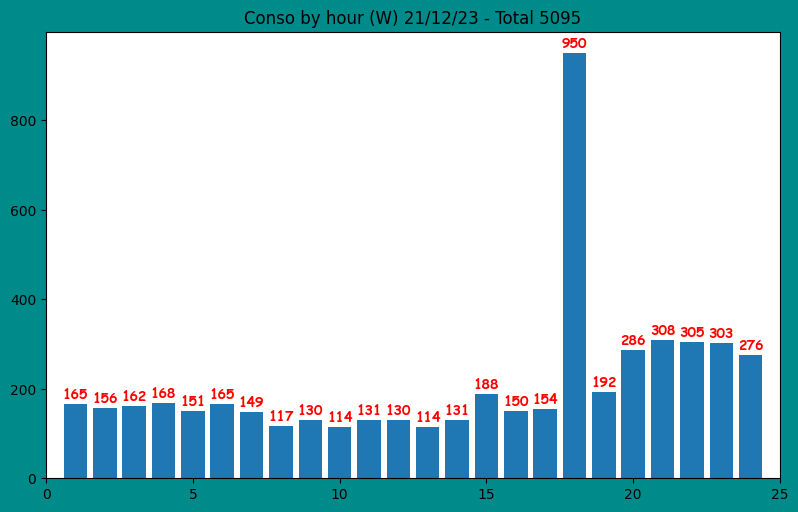

In [107]:
conso_by_hour(day)

In [108]:
sum(data)

5095

In [109]:
diff = grp_by_dayhours.loc[today]
diff


,kWh,cumsum,diff,days
hours,,,,
00,141,141,NaN,1.0
01,102,243,-39.0,2.0
02,107,350,5.0,3.0
03,109,459,2.0,4.0
04,108,567,-1.0,5.0
05,108,675,0.0,6.0
06,108,783,0.0,7.0
07,108,891,0.0,8.0
08,108,999,0.0,9.0


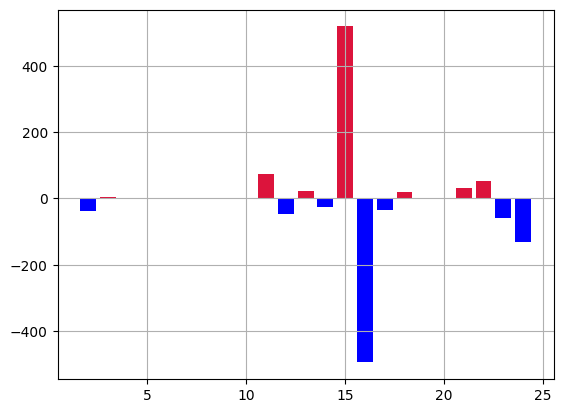

In [110]:
x = np.arange(1,len(diff)+1)

plt.bar(x,diff['diff'], color=np.where(diff['diff'] > 0, 'crimson', 'blue'))
plt.grid()

In [111]:
data

hours
00    165
01    156
02    162
03    168
04    151
05    165
06    149
07    117
08    130
09    114
10    131
11    130
12    114
13    131
14    188
15    150
16    154
17    950
18    192
19    286
20    308
21    305
22    303
23    276
Name: kWh, dtype: int64

<Axes: xlabel='hours'>

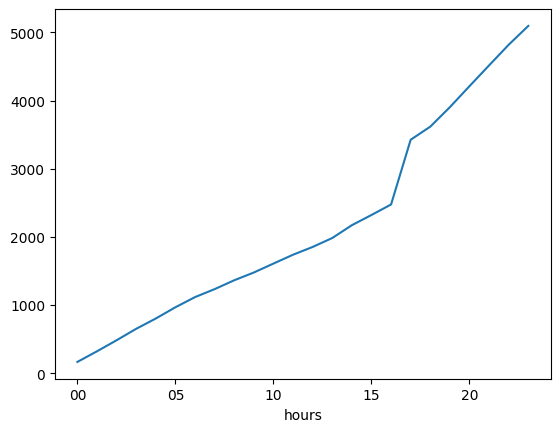

In [112]:
data.cumsum().plot()


<Axes: xlabel='hours'>

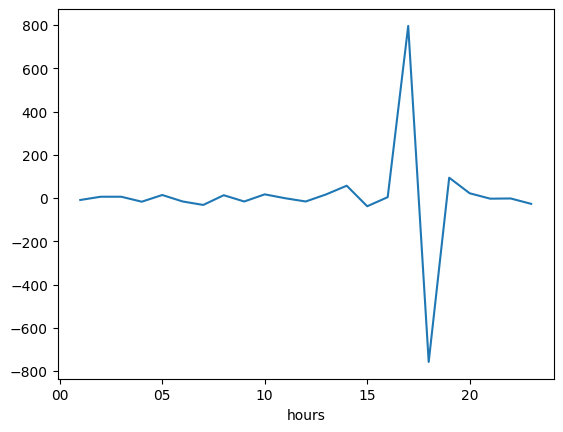

In [113]:
# evolution par heure
data.diff().plot()

In [114]:
data.diff().describe()

count     23.000000
mean       4.826087
std      236.027089
min     -758.000000
25%      -16.000000
50%       -1.000000
75%       15.500000
max      796.000000
Name: kWh, dtype: float64

<Axes: >

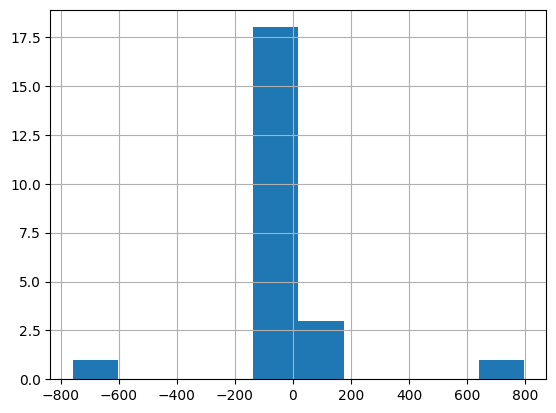

In [115]:
data.diff().hist()

# Test sauvegarde

In [116]:
import os
os.listdir(path='.')

['.git',
 '.gitignore',
 '.git_old',
 '.ipynb_checkpoints',
 '1row.flf',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'average_binding_energy_by_nucleons.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 

In [117]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [118]:
#conso_byhour(day)

In [119]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

# plot any day


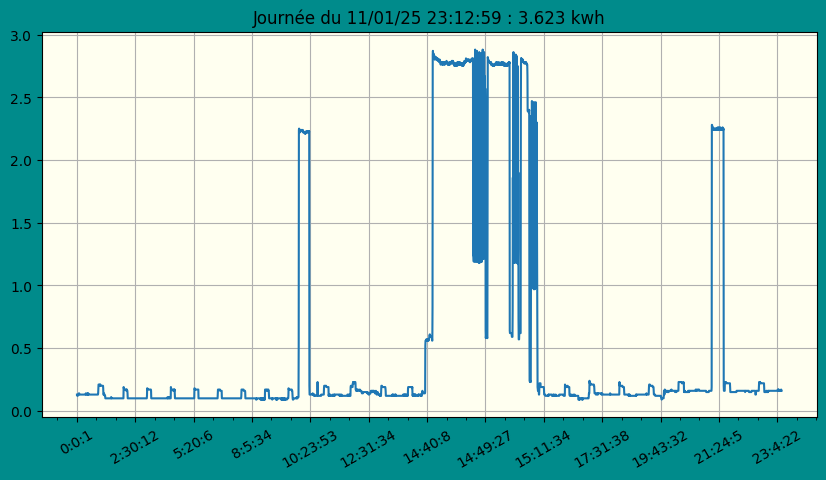

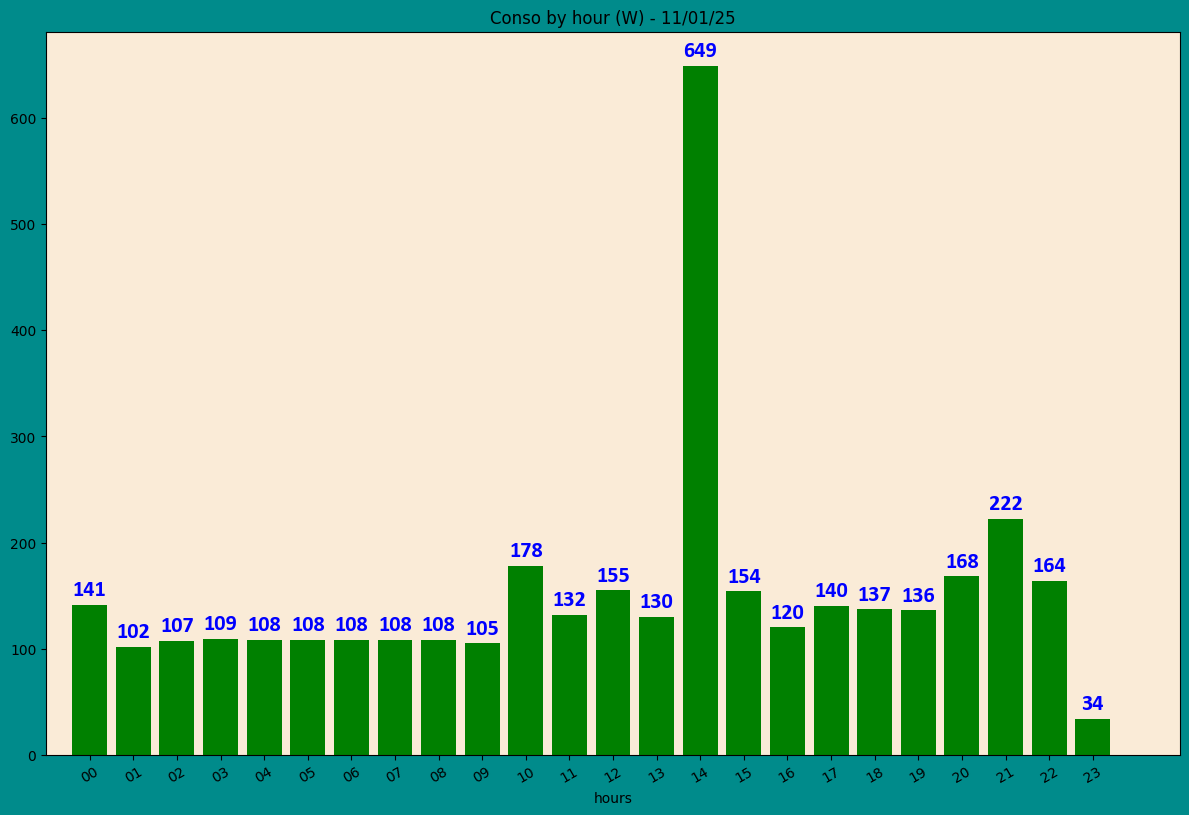

In [120]:
day = '27/10/24'
day = today
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [121]:
month.describe()


count    30.000000
mean      3.685467
std       0.506637
min       3.034000
25%       3.310500
50%       3.534000
75%       3.954500
max       5.049000
Name: kWh, dtype: float64

<Axes: >

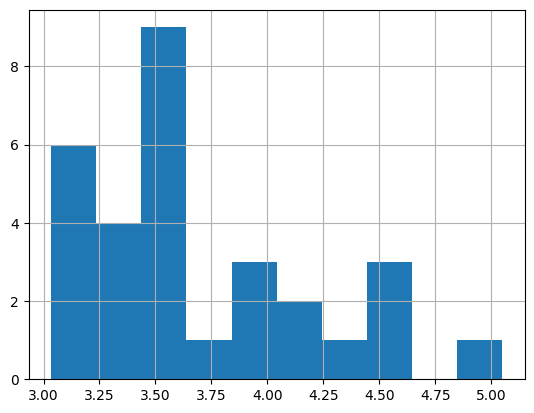

In [122]:
month.hist()

<Axes: xlabel='days'>

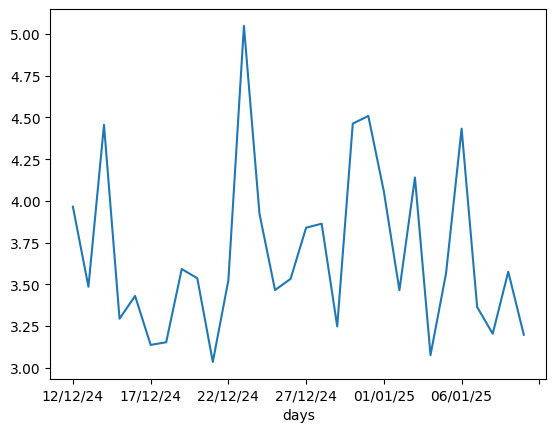

In [123]:
month.plot()

In [124]:
# date with max conso in 1 month
month.idxmax()

'23/12/24'

In [125]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
#day = '27/10/2024'
day

'23/12/24'

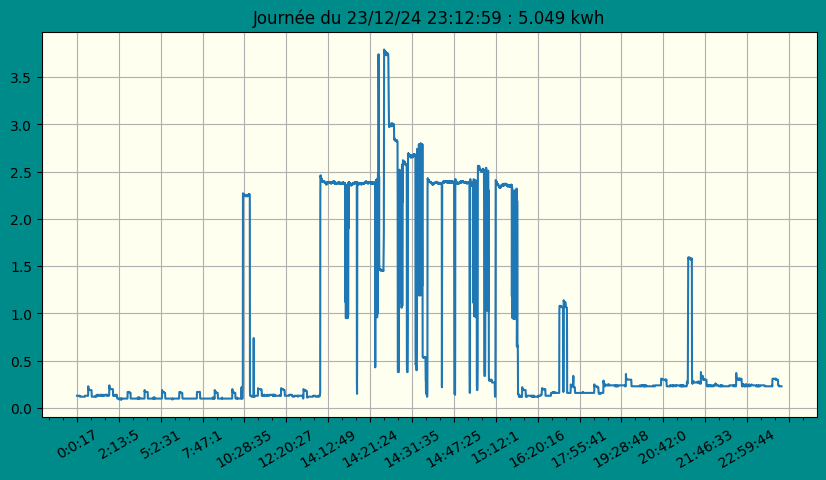

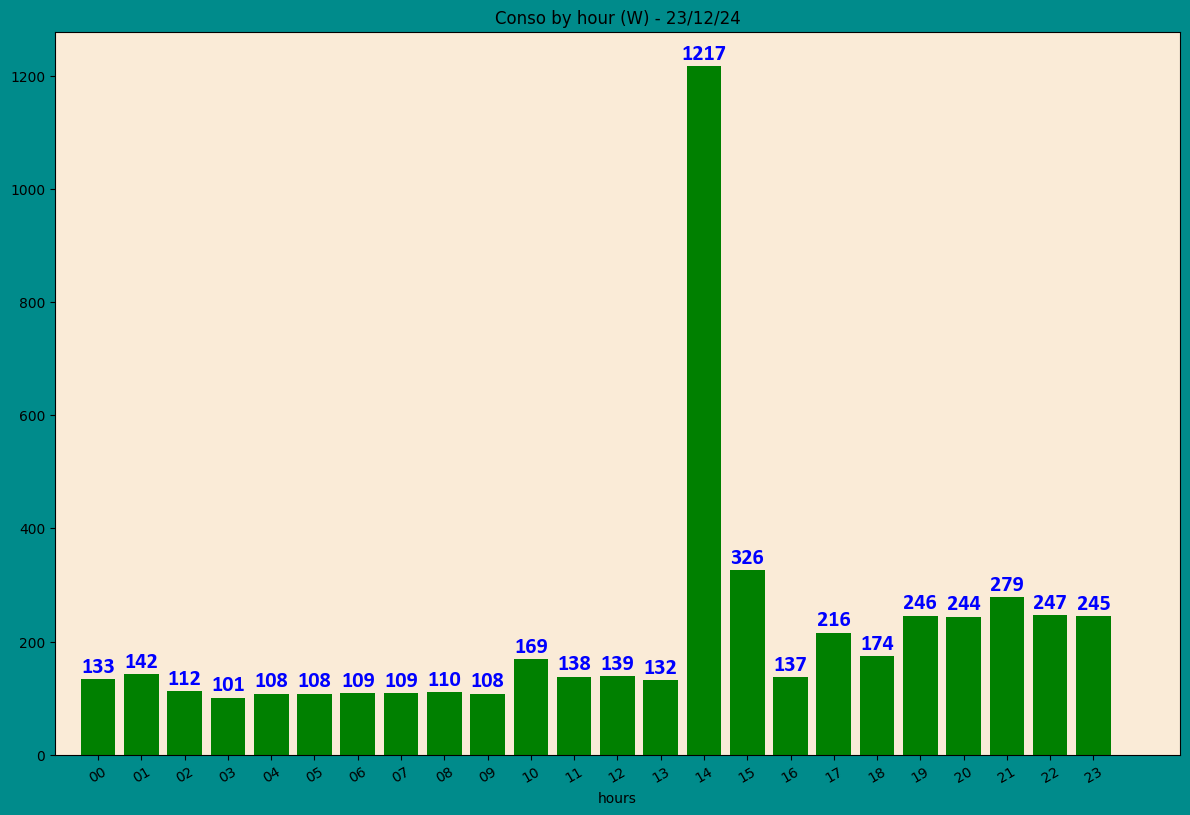

In [126]:
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [127]:
grp_by_dayhours

kWh  cumsum   diff  days
days     hours                          
21/08/23 20      76      76    NaN   NaN
         21     282     358  206.0   NaN
         22     157     515 -125.0   NaN
         23     132     647  -25.0   NaN
22/08/23 00     133     133    NaN   NaN
...             ...     ...    ...   ...
11/01/25 19     136    3035   -1.0  20.0
         20     168    3203   32.0  21.0
         21     222    3425   54.0  22.0
         22     164    3589  -58.0  23.0
         23      34    3623 -130.0  24.0

[12220 rows x 4 columns]

In [128]:
grp_by_dayhours.loc[month.idxmax()]

,kWh,cumsum,diff,days
hours,,,,
00,133,133,NaN,NaN
01,142,275,9.0,NaN
02,112,387,-30.0,NaN
03,101,488,-11.0,NaN
04,108,596,7.0,NaN
05,108,704,0.0,NaN
06,109,813,1.0,NaN
07,109,922,0.0,NaN
08,110,1032,1.0,NaN


In [129]:
grp_by_dayhours.columns

Index(['kWh', 'cumsum', 'diff', 'days'], dtype='object')

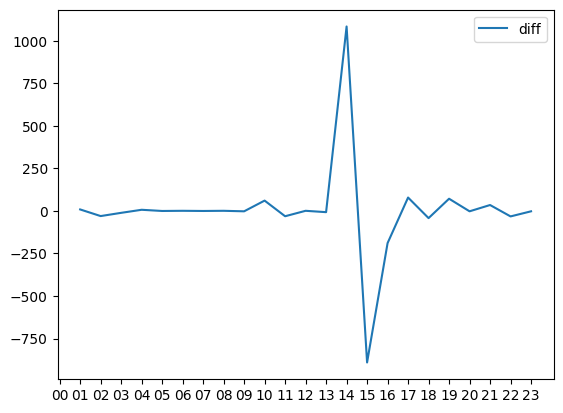

In [130]:
# diff
plt.plot(grp_by_dayhours.loc[month.idxmax()]['diff'],label=grp_by_dayhours.columns[2])
plt.legend()

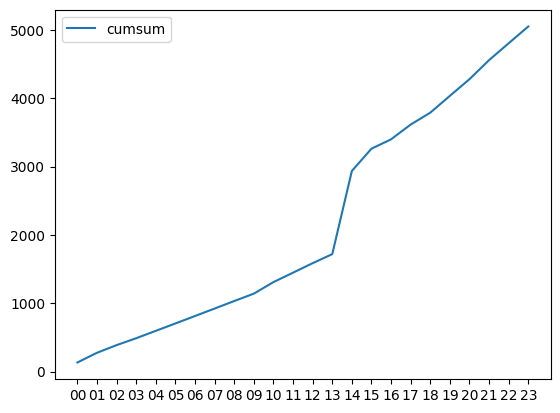

In [131]:
# cumsum
plt.plot(grp_by_dayhours.loc[month.idxmax()]['cumsum'],label=grp_by_dayhours.columns[1])
plt.legend()

In [132]:
# 41 s
# file to big to git sync

# create .gitignore
filename=r'../conso_data.csv'
#conso_data.to_csv(filename)
#43.6s size 140128 kB